In [1]:
!pip install opendatasets
!pip install pandas

In [2]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/waqasishtiaq/credit-card-fraud-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: veeragowri
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/waqasishtiaq/credit-card-fraud-dataset


100%|██████████| 66.0M/66.0M [00:00<00:00, 1.08GB/s]

Fraud vs Non-Fraud Count:
Class
0    284315
1       492
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.87      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.97      0.99     85443


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.70      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443



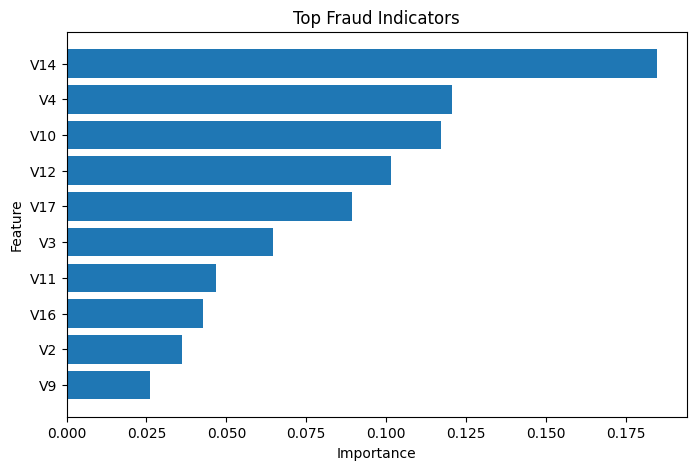


Model saved as credit_card_fraud_model.pkl


In [3]:
# Credit Card Fraud Detection

import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Load dataset
df = pd.read_csv("/content/credit-card-fraud-dataset/creditcard.csv")

# Check fraud vs non-fraud count
print("Fraud vs Non-Fraud Count:")
print(df['Class'].value_counts())

# 2. Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Optional: Remove Time column if needed
# X = X.drop('Time', axis=1)

# 3. Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 4. Baseline model: Logistic Regression
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

print("\nLogistic Regression Performance:")
print(classification_report(y_test, log_pred))

# 5. Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_pred))

# 6. Feature Importances
importances = rf_model.feature_importances_
features = X.columns

feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

# 7. Plot Feature Importances
plt.figure(figsize=(8, 5))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top Fraud Indicators")
plt.gca().invert_yaxis()
plt.show()

# 8. Save best model
joblib.dump(rf_model, "credit_card_fraud_model.pkl")
print("\nModel saved as credit_card_fraud_model.pkl")
